## PCA and Clustering of country data

##### problem statement:- 

After the current funding programs, International Humanitarian NGO has raised around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision have mostly related to the countries in dire need of Aid. Our job is as Data analyst is to classify the countries using the socio-economic and health factors that determine the overall development of nations. After this analysis, we need to suggest countries that the CEO needs to focus on and give the highest priority

In [1]:
#importing the panda lib to load data set
import pandas as pd

In [68]:
df = pd.read_csv("C:/Users/Vaibhav/Desktop/AD ML DATA SET/Country-data.csv")

In [69]:
country = df.iloc[:,0]

In [70]:
country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [64]:
# drop the country column because it is not neccessary for clustering
df.drop(["country"],axis = 1, inplace = True)

In [7]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df.shape

(167, 9)

In [9]:
x = df.iloc[:,:]

In [10]:
# As all the data is in numeric so no need to encoding but we need to scale the data
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [11]:
# forming a dataframe for our scaled data
x_st = pd.DataFrame(x)
x_st.columns = df.columns

In [12]:
x_st

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [14]:
# Buliding a constructer for PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_st)
print(pca.explained_variance_ratio_) # it explain the variance explained by each column
# you can see that 45% of variance is explained by 1st column itself.

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


In [16]:
# Cumulative Variance Explained:
import numpy as np
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

print("Cumulative Variance Explained", cum_var_exp*100)

# seeing the cumulative variance which is obtained by v1 = v1, v2= v1+v2,...so on.
# cumulative variance helps us to know how much data explained together by columns
# for ex:- first 2 column are able to explain 63% of data, so if you take 3 component it will explain your 76% of your data
# we don't take 4 or 5 component because it is difficult to visualize the model in 4-d or 5-d.

Cumulative Variance Explained [ 45.95173979  63.13336544  76.13762433  87.19078614  94.53099756
  97.01523224  98.27566264  99.25694438 100.        ]


In [38]:
# creating a array with 3 component that is pca_new
pca_reduced = PCA(n_components = 3)
pca_new = pca_reduced.fit_transform(x_st)
print(pca_reduced.explained_variance_ratio_)

[0.4595174  0.17181626 0.13004259]


In [39]:
# 3 component explain 76% of data
#Creating a Pandas DataFrame of reduced Dataset
newsk_df = pd.DataFrame(pca_new , columns = ['PC1','PC2','PC3'])
newsk_df


,PC1,PC2,PC3
0,-2.913025,0.095621,-0.718118
1,0.429911,-0.588156,-0.333486
2,-0.285225,-0.455174,1.221505
3,-2.932423,1.695555,1.525044
4,1.033576,0.136659,-0.225721
...,...,...,...
162,-0.820631,0.639570,-0.389923
163,-0.551036,-1.233886,3.101350
164,0.498524,1.390744,-0.238526
165,-1.887451,-0.109453,1.109752


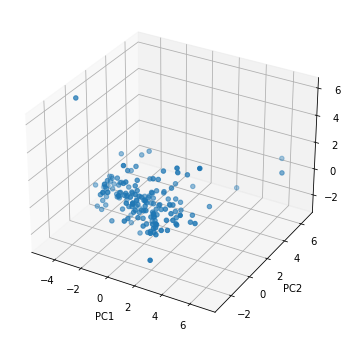

In [40]:
# visualizing our 3-d PCA component 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,6))
ax3D = fig.add_subplot(111, projection='3d')
ax3D.scatter(newsk_df.iloc[:,0], newsk_df.iloc[:,1], newsk_df.iloc[:,2], s=20, marker='o')  
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

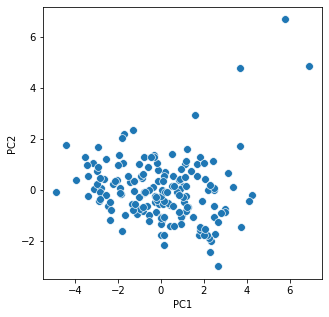

In [41]:
# plot the data projected onto principal components 2-d representation
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sb.scatterplot(data = newsk_df , x = 'PC1',y = 'PC2' , s = 60)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1144.3484937500464, 698.2105570167531, 549.8150157625264, 441.91899589131515, 380.5039990653807, 330.822856004207, 286.6185550767114, 256.47923788308987, 220.5108674281488, 199.168020507848]


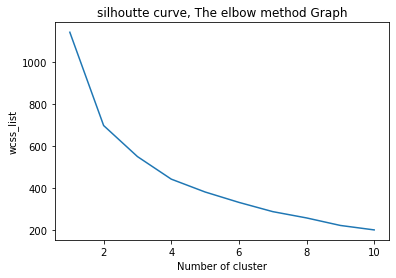

In [46]:
# elbow method is used to find the value of "K" that how many cluster are going to form.
# elbow method :- the value of k is the point after a that their value remain constant.
# we import the kmeans class of sklearn.cluster lib to form the cluster.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# next we have created the wcss_list variable to intialize an empty list,
# which is used

wcss_list = [] #It contain sum of square of all the data set A/c to cluster

for i in range(1,11):
    k_mean = KMeans(n_clusters = i,init = "k-means++", random_state = 1)
    k_mean.fit(pca_new)
    wcss_list.append(k_mean.inertia_)#silhoutte curve
plt.plot(range(1,11),wcss_list)
plt.title("silhoutte curve, The elbow method Graph")
plt.xlabel("Number of cluster")
plt.ylabel("wcss_list")
plt.show

print(wcss_list)

In [47]:
# by graph it is difficult to the value of "K" so thier is a direct formula to find that.
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss_list, curve = "convex",direction = "decreasing")
kl.elbow

4

In [48]:
# buliding our k-means contructer and pred the class for each datapoint
k_mean = KMeans(n_clusters = 3, init = "k-means++", random_state = 1)
y_pred = k_mean.fit_predict(pca_new)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


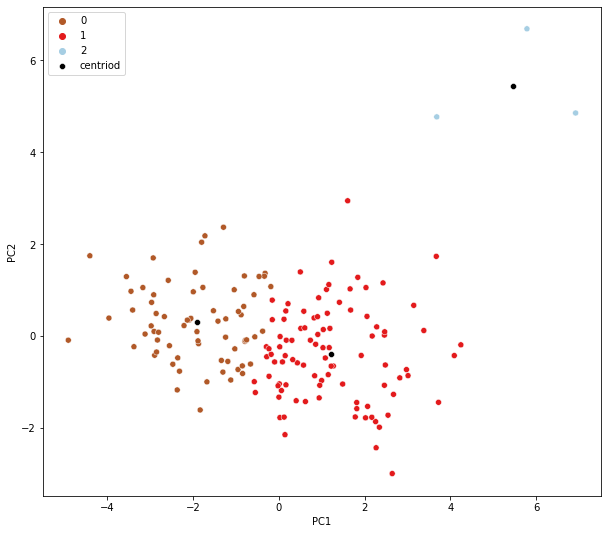

In [49]:
# 2-d visual of data with class
import seaborn as sns
fig = plt.figure(figsize =(10,9))
sns.scatterplot(pca_new[:,0],pca_new[:,1],hue = y_pred,palette="Paired_r")
sns.scatterplot(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1],label = "centriod",color = "black")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

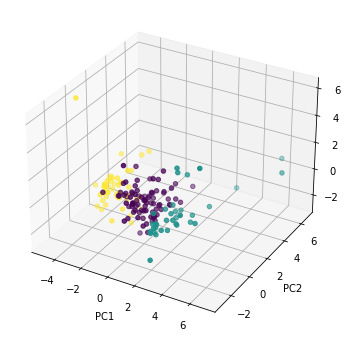

In [37]:
# 3-d visual
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,6))
ax3D = fig.add_subplot(111, projection='3d')
ax3D.scatter(pca_new[:,0], pca_new[:,1], pca_new[:,2], s=20, c=y_pred, marker='o')  
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [71]:
# concatinating the country with category which we predict.
new_df = pd.concat([country,newsk_df, pd.DataFrame(y_pred,columns =["category"])] , axis = 1)

In [72]:
new_df

,country,PC1,PC2,PC3,category
0,Afghanistan,-2.913025,0.095621,-0.718118,0
1,Albania,0.429911,-0.588156,-0.333486,1
2,Algeria,-0.285225,-0.455174,1.221505,1
3,Angola,-2.932423,1.695555,1.525044,0
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,1
...,...,...,...,...,...
162,Vanuatu,-0.820631,0.639570,-0.389923,0
163,Venezuela,-0.551036,-1.233886,3.101350,1
164,Vietnam,0.498524,1.390744,-0.238526,1
165,Yemen,-1.887451,-0.109453,1.109752,0


AIM is completed :- Our job is as Data analyst is to classify the countries using the socio-economic and health factors that determine the overall development of nations.